In [4]:
import os
print("Working Dir:", os.getcwd())


Working Dir: C:\Users\djouv\Projects\spiderfoot\extras\notebooks


In [5]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
print("Project Root:", project_root)
print("Contents of Root:", os.listdir(project_root))


Project Root: C:\Users\djouv\Projects\spiderfoot
Contents of Root: ['.dockerignore', '.git', '.github', '.gitignore', '.ipynb_checkpoints', '.pylintrc', '.venv', 'correlations', 'data', 'docker-compose-dev.yml', 'docker-compose-full.yml', 'docker-compose.yml', 'Dockerfile', 'Dockerfile.full', 'docs', 'extras', 'extras.409e9dfa-e2a9-4889-bc77-e1d9be566c5b', 'generate-certificate', 'LICENSE', 'modules', 'README.md', 'requirements.txt', 'setup.cfg', 'sf.py', 'sfcli.py', 'sflib.py', 'sfscan.py', 'sfwebui.py', 'spiderfoot', 'test', 'THANKYOU', 'Untitled.ipynb', 'VERSION']


In [2]:
import os
print("Working Dir:", os.getcwd())
print("Root Contents:", os.listdir(os.getcwd()))


Working Dir: C:\Users\djouv\Projects\spiderfoot\extras\notebooks
Root Contents: ['.ipynb_checkpoints', 'data_analysis.ipynb']


In [3]:
print("Data folder contains:", os.listdir(os.path.join(os.getcwd(), 'data')))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\djouv\\Projects\\spiderfoot\\extras\\notebooks\\data'

In [1]:
import json, pandas as pd
with open('../../data/sample_scan.json') as f:
    records = json.load(f)
df = pd.json_normalize(records)
df


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
# Cell: Load data with BOM support
import json
import pandas as pd

# Absolute path to the JSON
json_path = os.path.join(project_root, 'data', 'sample_scan.json')
print("Loading from:", json_path)

# Use utf-8-sig to strip any BOM
with open(json_path, 'r', encoding='utf-8-sig') as f:
    records = json.load(f)

df = pd.json_normalize(records)
print("DataFrame preview:")
df


Loading from: C:\Users\djouv\Projects\spiderfoot\data\sample_scan.json
DataFrame preview:


,entity,risk,confidence,nb_records
0,127.0.0.1,45,80,5
1,192.168.1.1,10,60,2
2,10.0.0.5,90,95,12


In [8]:
# Cell: Feature engineering
features = df[['risk', 'confidence', 'nb_records']].fillna(0)
features


,risk,confidence,nb_records
0,45,80,5
1,10,60,2
2,90,95,12


In [9]:
# Cell: Clustering & anomaly detection
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)
df['cluster'] = kmeans.labels_

# Isolation Forest
iso = IsolationForest(contamination=0.2, random_state=0).fit(features)
df['anomaly'] = iso.predict(features)  # -1 = anomaly, 1 = normal

# Show results
df


,entity,risk,confidence,nb_records,cluster,anomaly
0,127.0.0.1,45,80,5,0,1
1,192.168.1.1,10,60,2,0,1
2,10.0.0.5,90,95,12,1,-1


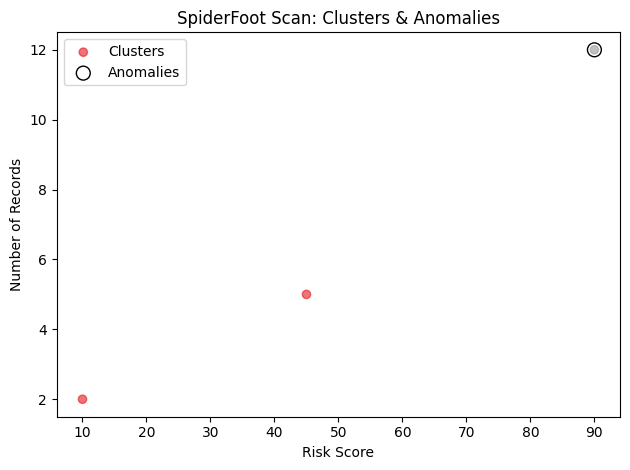

In [10]:
# Cell: Visualization
import matplotlib.pyplot as plt

plt.scatter(df['risk'], df['nb_records'],
            c=df['cluster'], cmap='Set1', alpha=0.6,
            label='Clusters')
# Highlight anomalies
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies['risk'], anomalies['nb_records'],
            facecolors='none', edgecolors='k', s=100,
            label='Anomalies')

plt.xlabel('Risk Score')
plt.ylabel('Number of Records')
plt.title('SpiderFoot Scan: Clusters & Anomalies')
plt.legend()
plt.tight_layout()
plt.show()
